# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

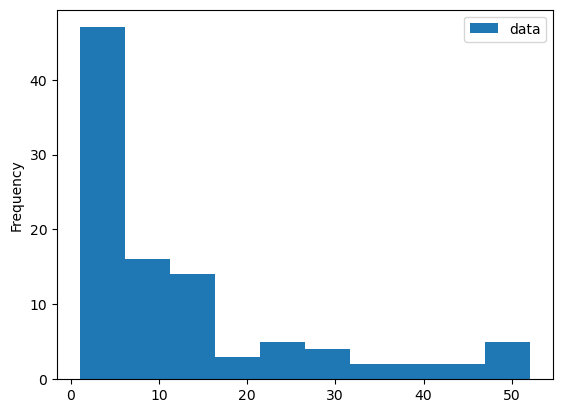

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

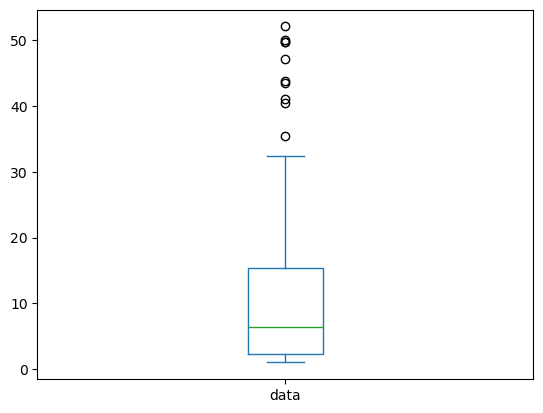

In [3]:
df.plot.box()

***
### Pros and Cons of Each Visualization:

**Histogram:**

*Pros:*
- Shows how drug prices are spread, including where most prices are and if data is skewed.
- Helps to see the shape of the data, like if it is normal or not.
- Makes it easy to see common price ranges.

*Cons:*
- Does not show exact percentiles or outliers.
- The way data looks can change depending on bin size, which can be misleading.


**Boxplot:**

*Pros:*
- Clearly shows the median, quartiles, and spread of prices.
- Makes it easy to see outliers and if prices are very different from each other.

*Cons:*
- Does not show full distribution, only key statistics.
- Might be harder to interpret for someone unfamiliar with boxplots.

### Which would you choose?

For the pharmacy administrator's goal of understanding how much the more expensive drugs tend to cost in the context of other prices, the **boxplot is the better choice**. It shows the upper quartile, which directly answers the question about expensive drugs. It also highlights the outliers and the whole range of prices, so we can easily see the extreme values. The boxplot also presents the median and interquartile range in a simple way, making it easier to compare the typical drug prices with the very expensive ones.

### Suggested Improvements:

For the Histogram:
- **Change bin size:** Try different bin sizes to see more details.
- **Add labels:** Mark important percentiles (25th, 50th, 75th) with lines or text to help understand the data better.
- **Color and style:** Use gradient colors or shading to show where most values are, making it easier to see patterns.

For the Boxplot:
- **Add labels:** Label the median, quartiles, and outliers to make it easy to read.
- **Color and style:** Use different colors for the box, whiskers, and outliers to make the plot visually appealing and easier to understand.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
loan = pd.read_csv('loan.csv')

<h1 style="text-align: center;">Dataset Summary</h1>
To do an quick recap of the dataset

In [6]:
# Basic information about the dataset
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
# Statistics for numeric columns
loan.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [8]:
# First few rows of the dataset
print("Sample Data:\n")
loan.head()

Sample Data:



,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


<h1 style="text-align: center;">Data Analysis</h1>


<div style="border-radius: 10px; border: green solid; padding: 10px; background-color: #; font-size: 100%;">

- ### Histograms and histogram variants for each feature or column. (Swarm plot, kde plot, violin plot).


In [9]:
numeric_columns = loan.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')


### Histograms

Histograms show the distribution of numerical data, allowing us to see patterns.

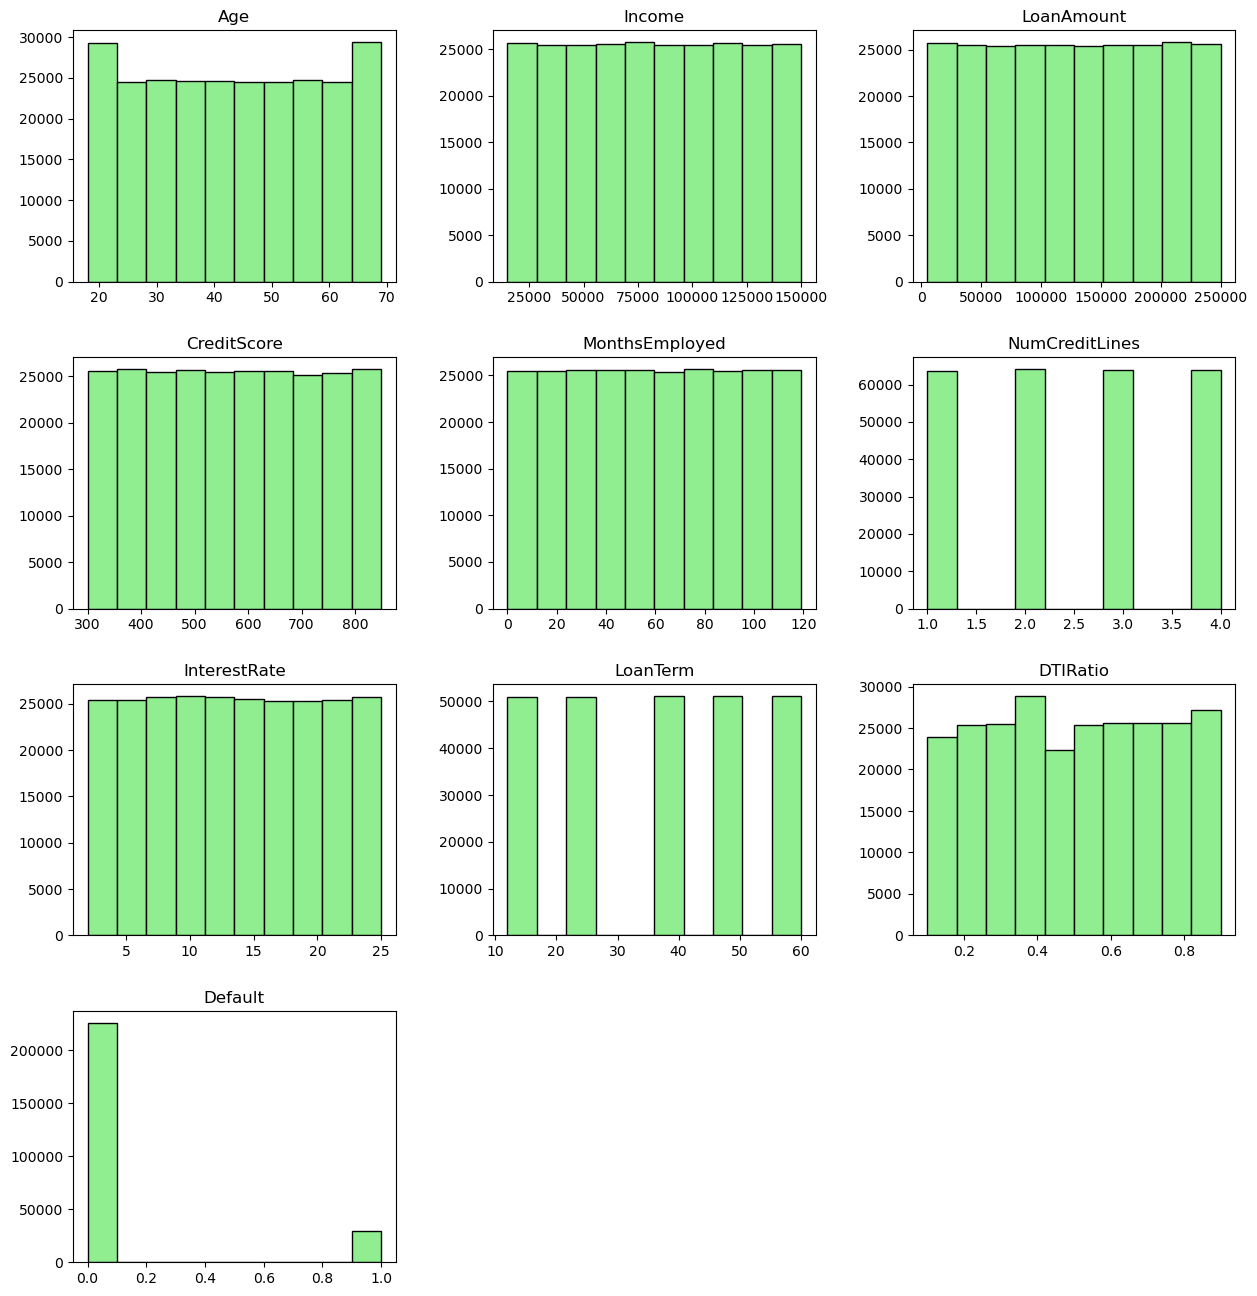

In [10]:
_ = loan.hist(figsize=(15, 16),color = 'lightgreen', edgecolor='black', grid = False)

### Finding:

- `Income, Loan Amount, Credit Score, Months Employed, DTI Ratio and Interest Rate` look like a uniform distribution, meaning values are spread almost evenly.
- `Age` has a symmetric, bimodal shape with two peaks.
- `Loan Term` show gaps in the distribution, possibly due to some values are more common.
- `Default Status` is highly imbalanced, with most borrowers not defaulting (0) and a small fraction defaulting (1), making it a skewed binary distribution.

### KDE (Kernel Density Estimation) Plots

KDE is a smoothed version of the histogram. It helps to see the shape of the distribution more clearly.

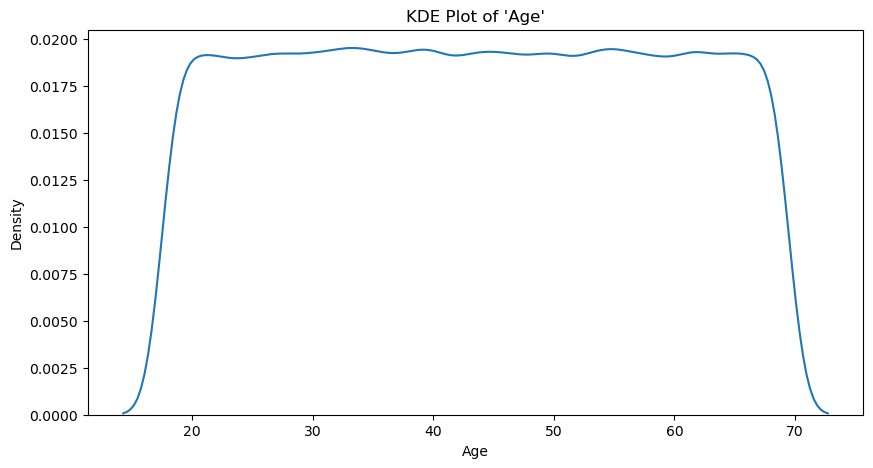

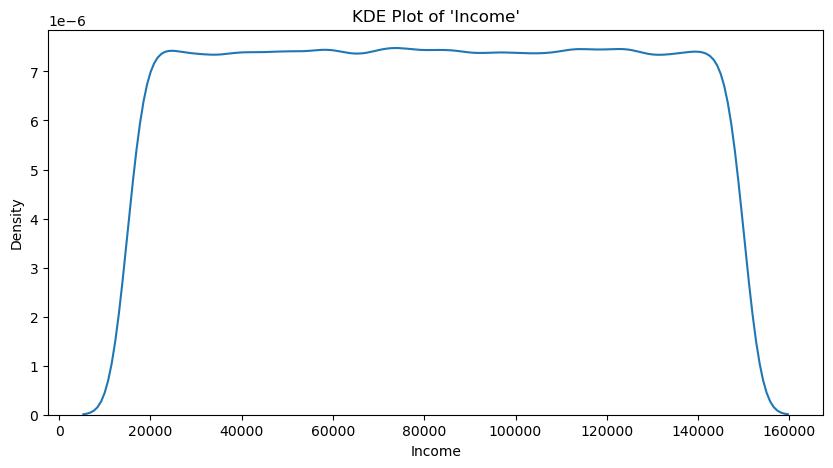

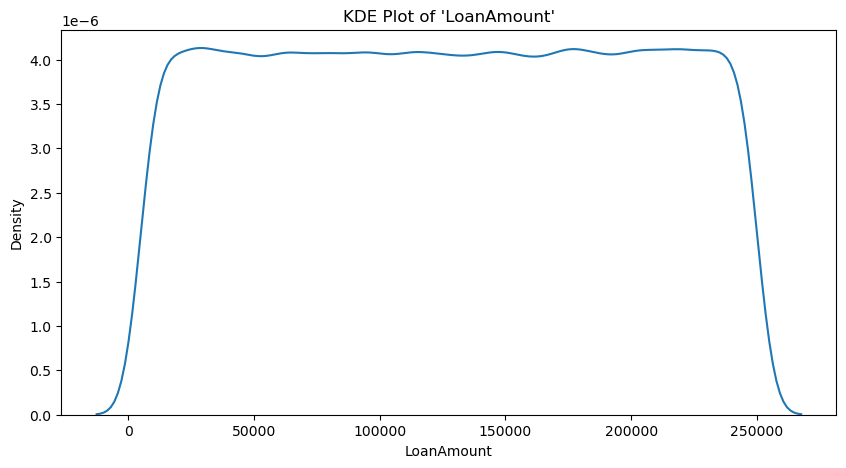

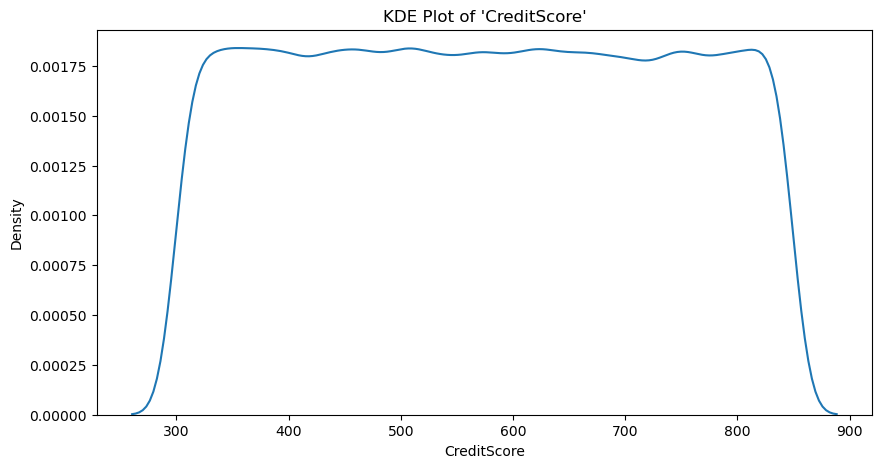

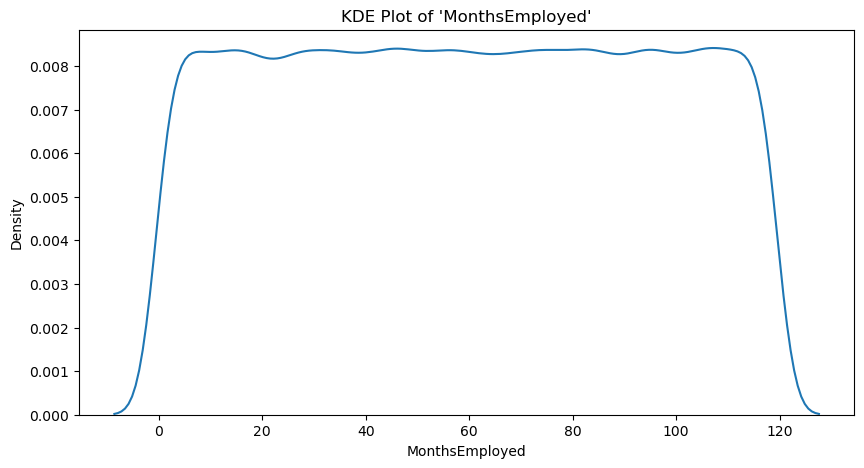

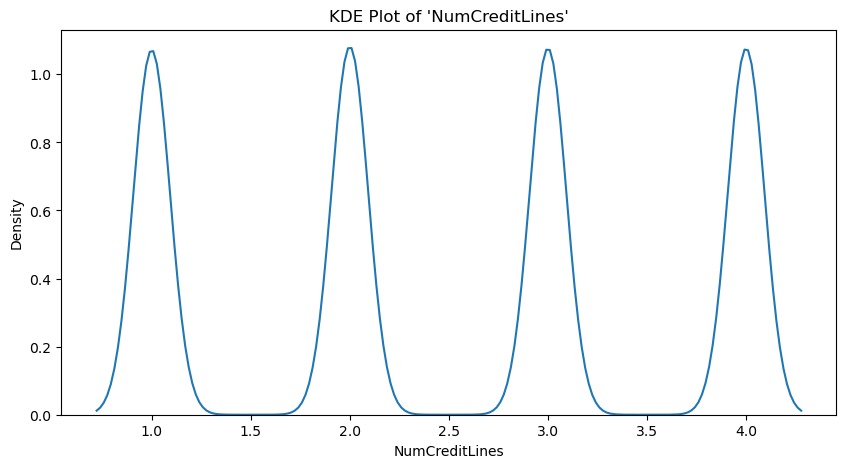

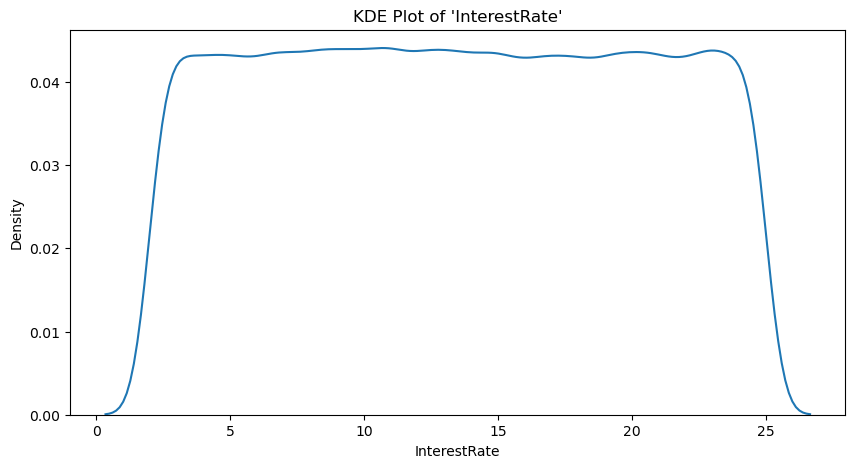

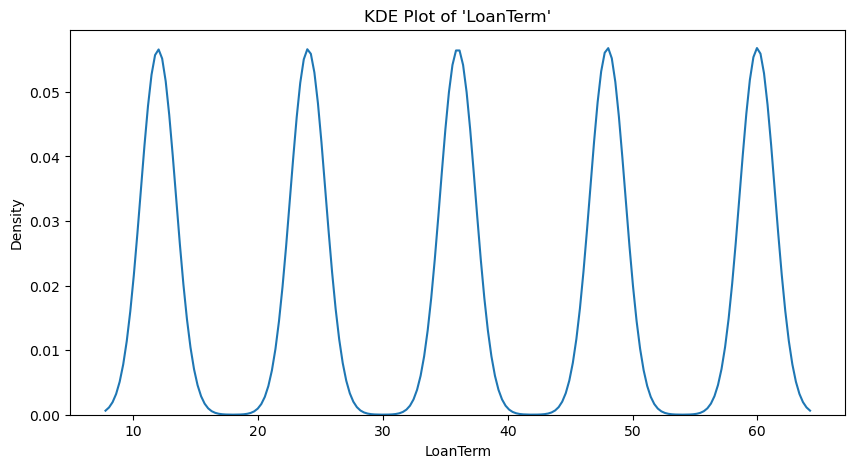

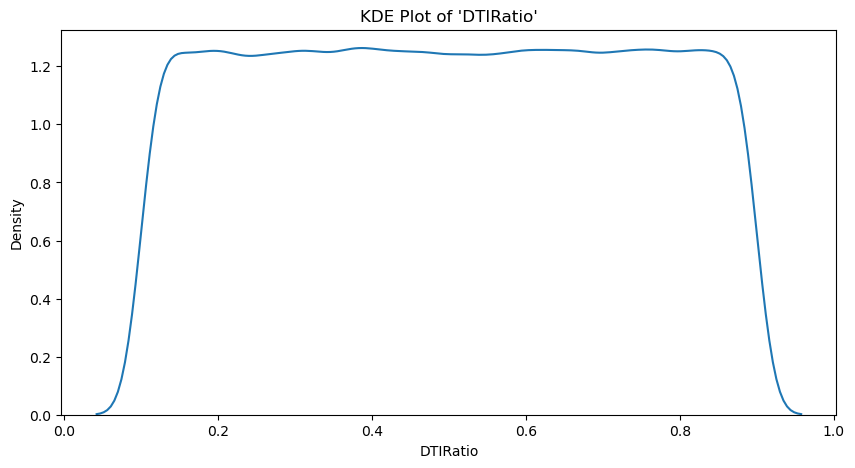

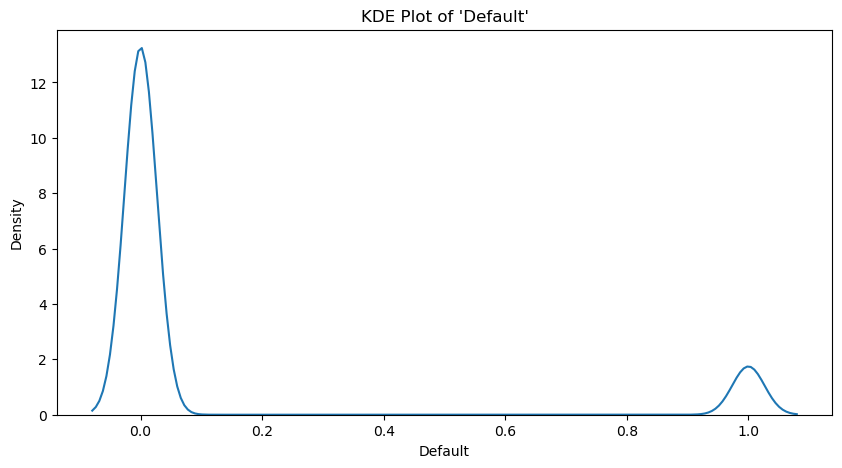

In [11]:
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    
    sns.kdeplot(loan[col])
    
    plt.title(f"KDE Plot of '{col}'")
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

### Violin Plot

Violin plot combines aspects of a box plot and a KDE plot, showing the data distribution as well as the range and outliers.

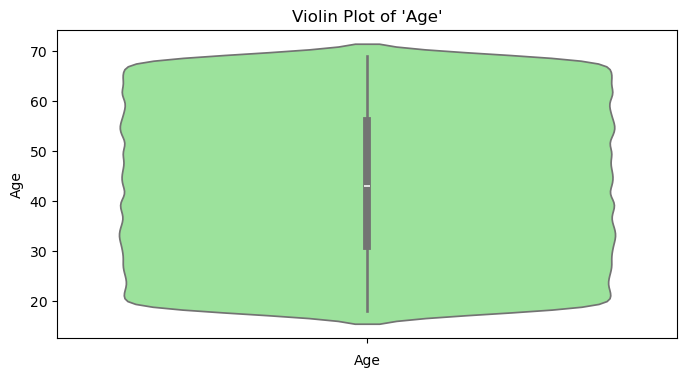

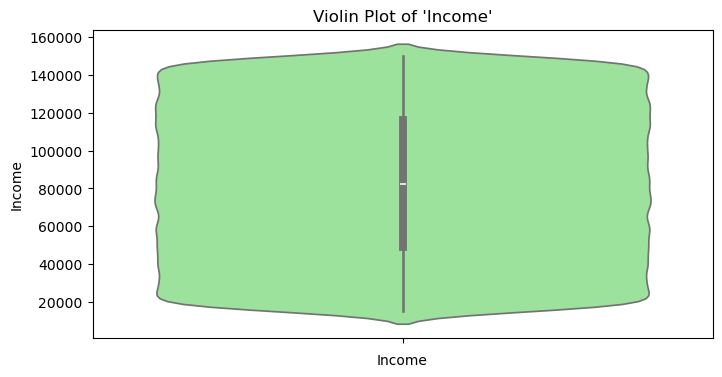

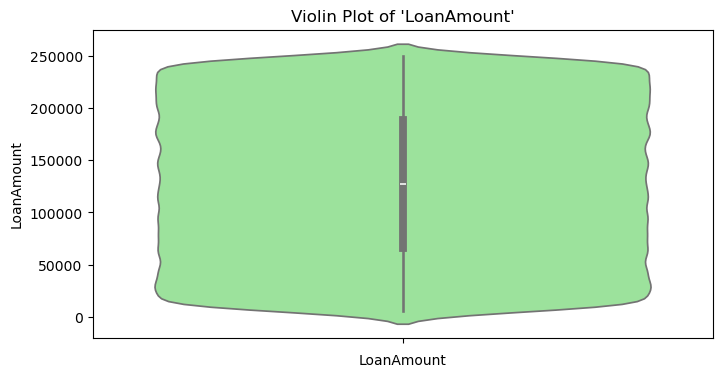

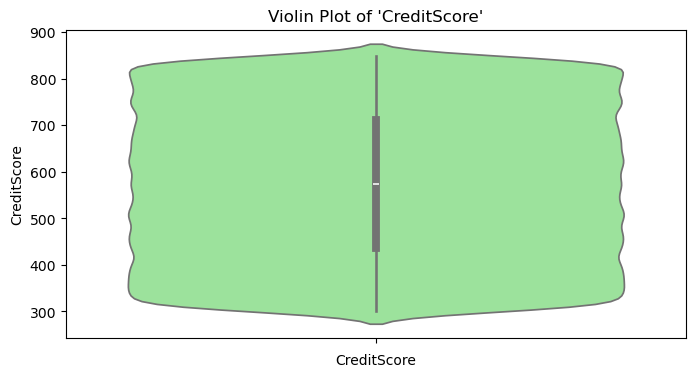

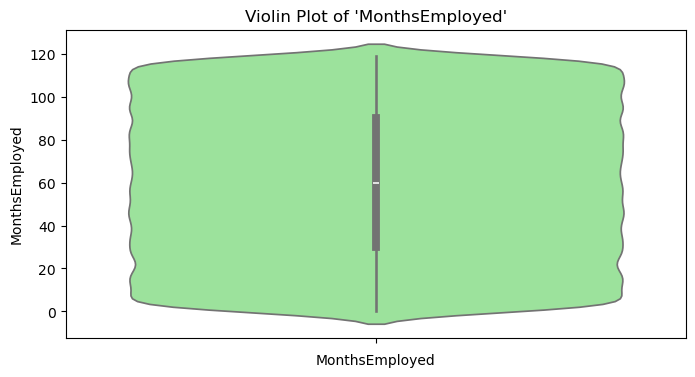

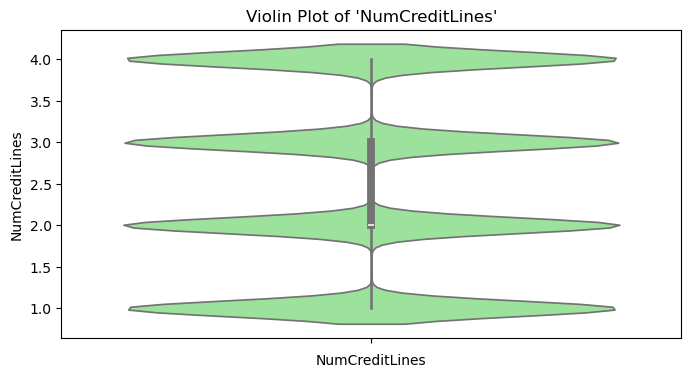

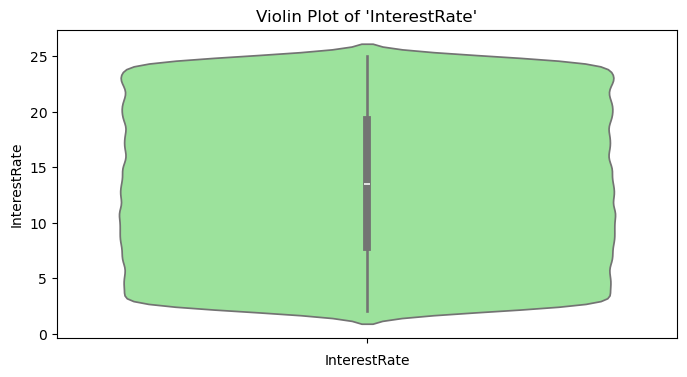

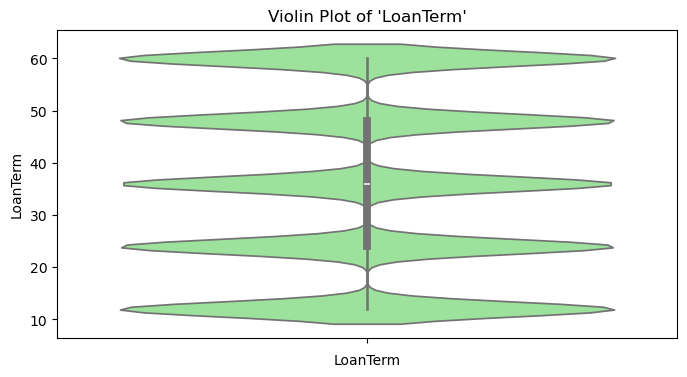

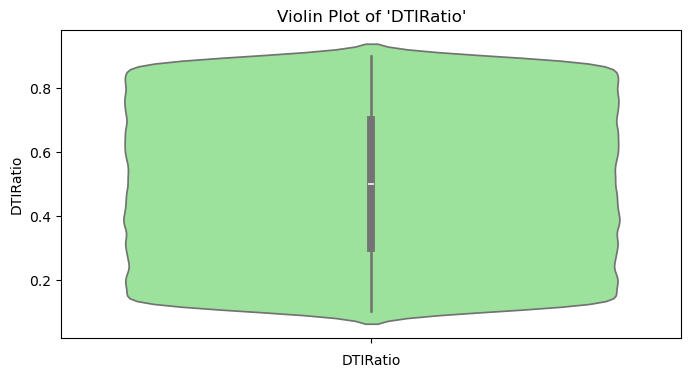

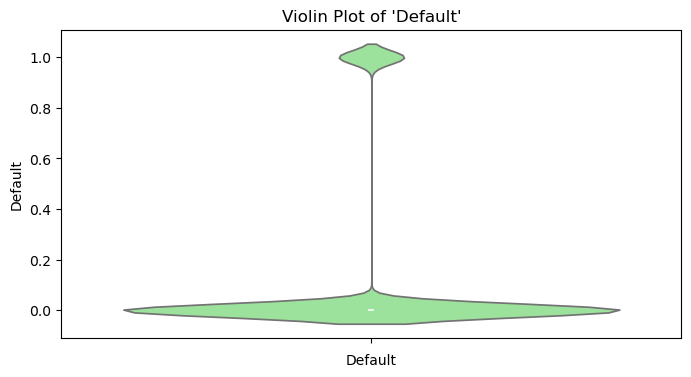

In [12]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4)) 
    
    sns.violinplot(y=loan[col], color='lightgreen')
    
    plt.title(f"Violin Plot of '{col}'")
    plt.xlabel(col)
    plt.show()

### Swarm Plot
Swarm plot helps to see individual data points and how they are distributed.

Since swarm plots can be slow for large datasets like this one, I **sample 500** rows to speed up performance.

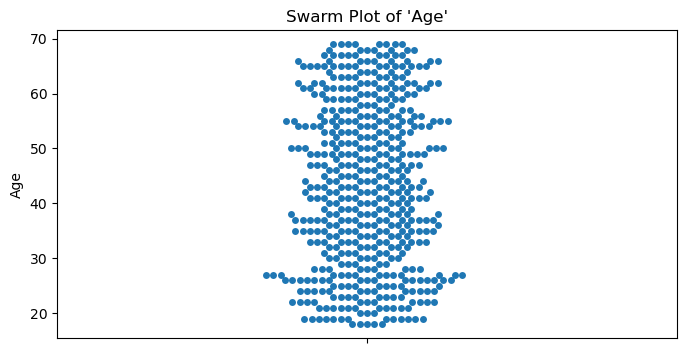

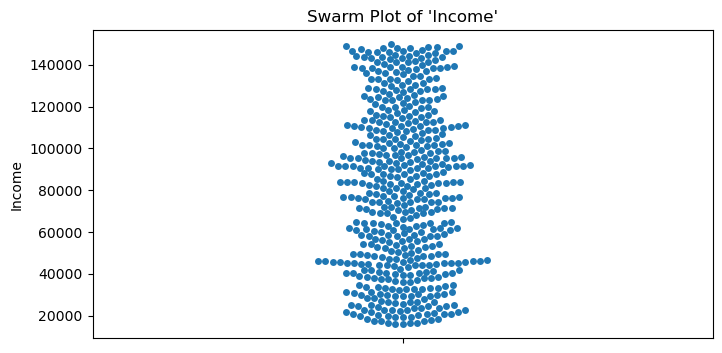

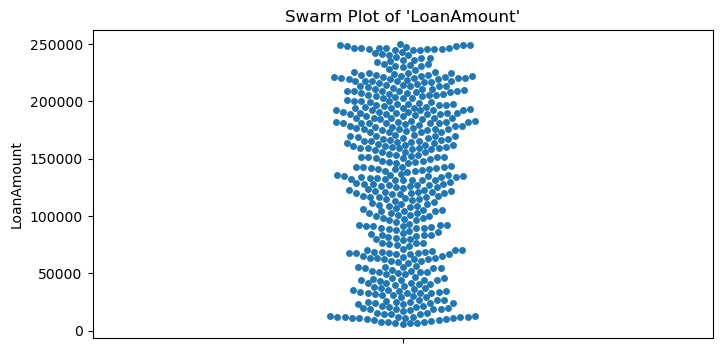

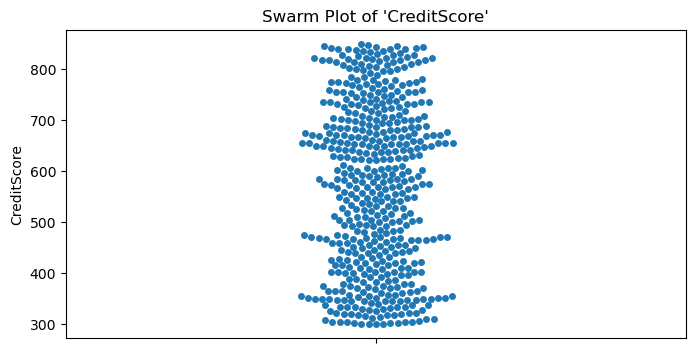

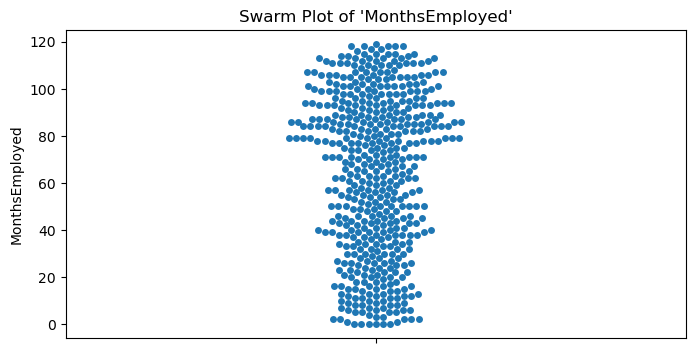

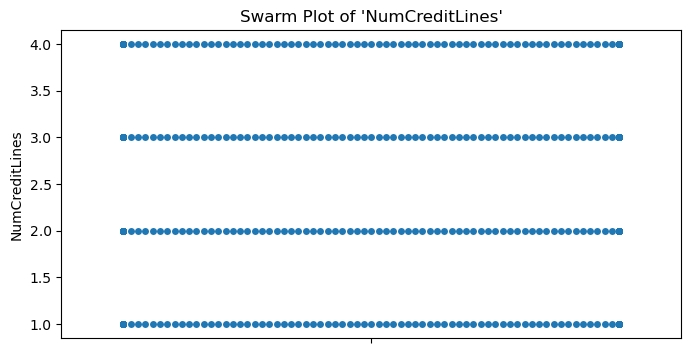

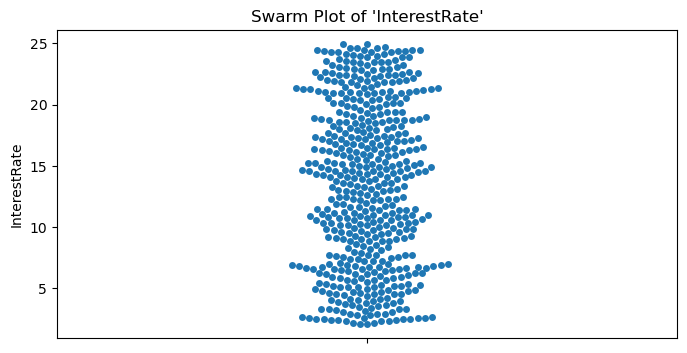

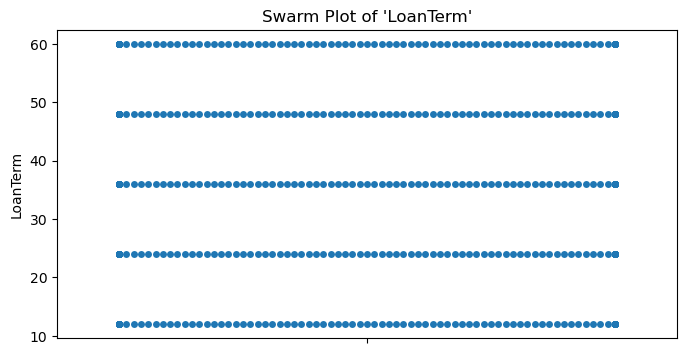

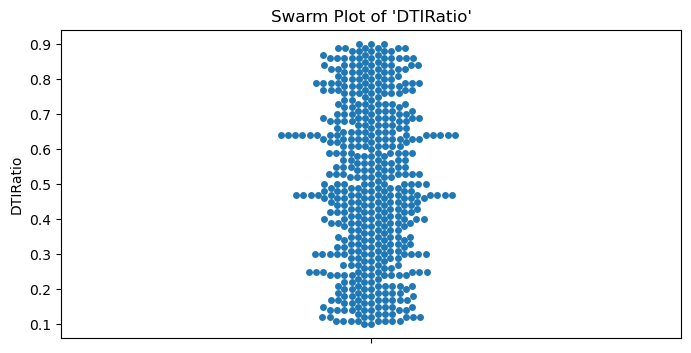

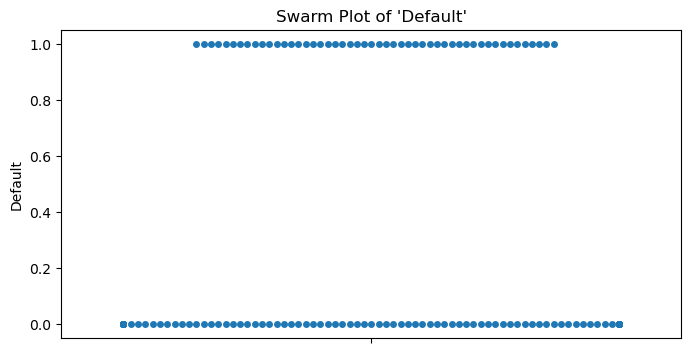

In [13]:
import warnings

# not show UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    
    sample_data = loan[col].sample(n=500, random_state=42)
    sns.swarmplot(y=sample_data)
    
    plt.title(f"Swarm Plot of '{col}'")
    plt.show()

<div style="border-radius: 10px; border: green solid; padding: 10px; background-color: #; font-size: 100%;">

- ### Draw grouped histograms. For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.


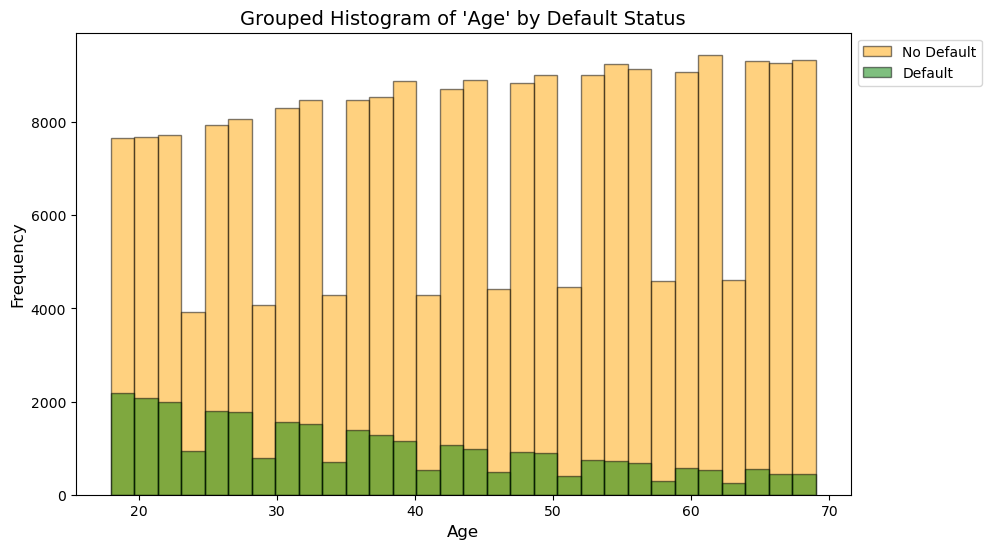

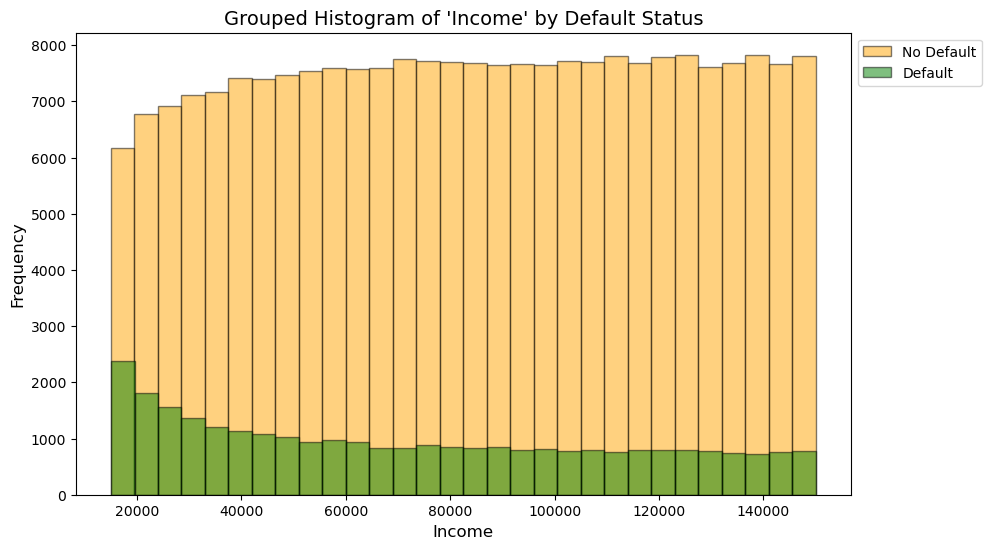

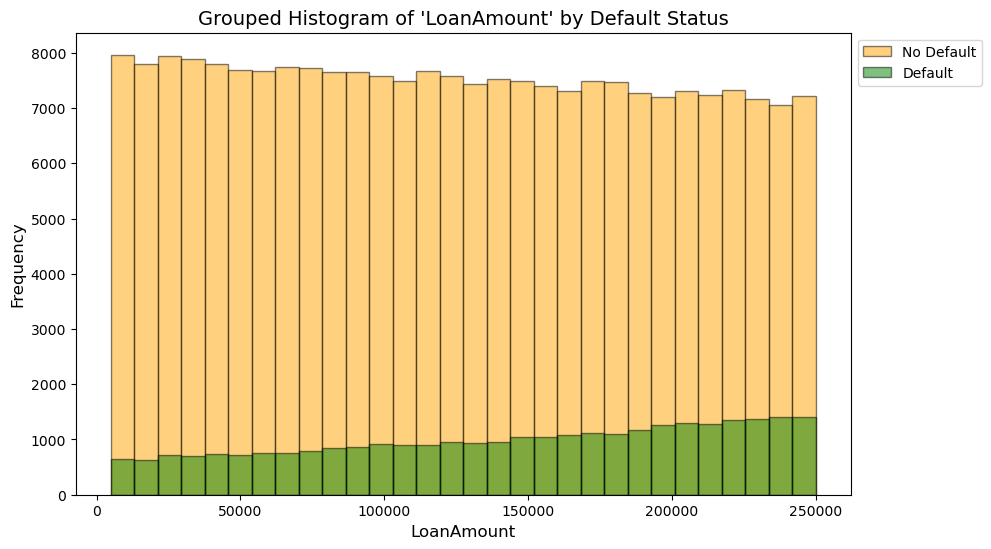

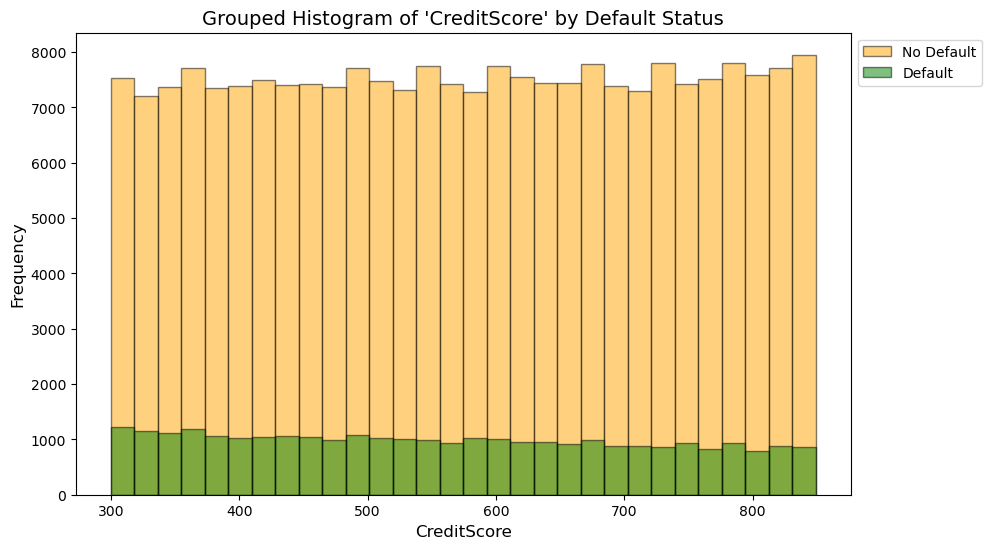

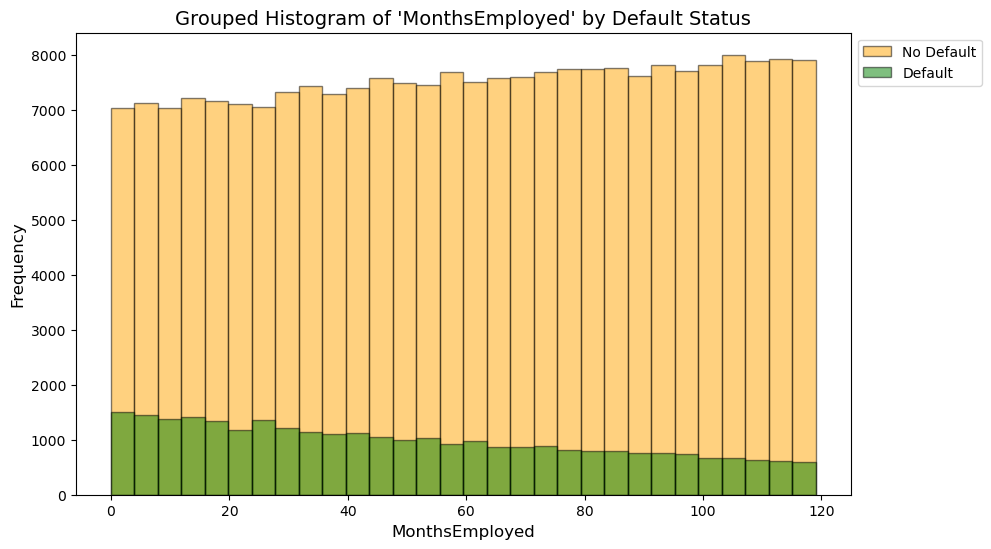

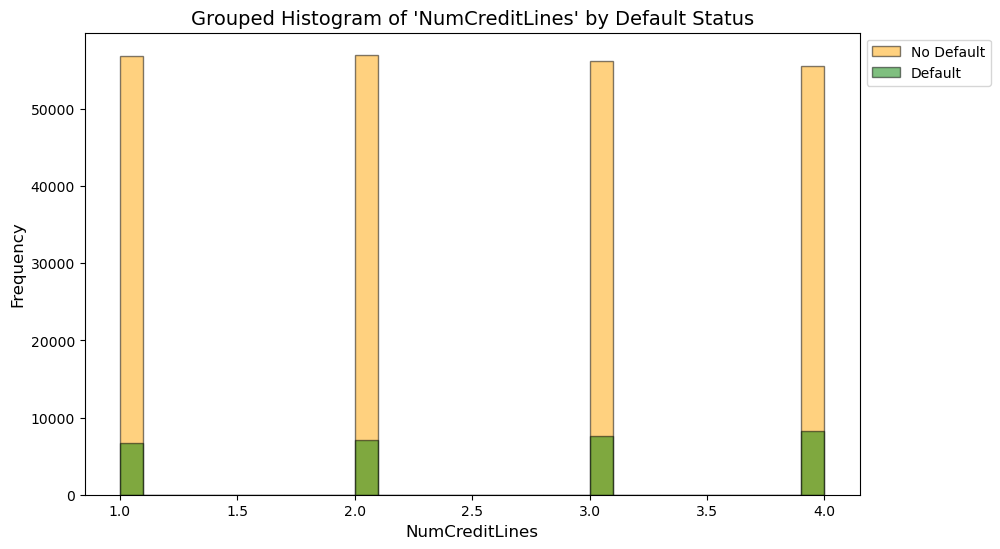

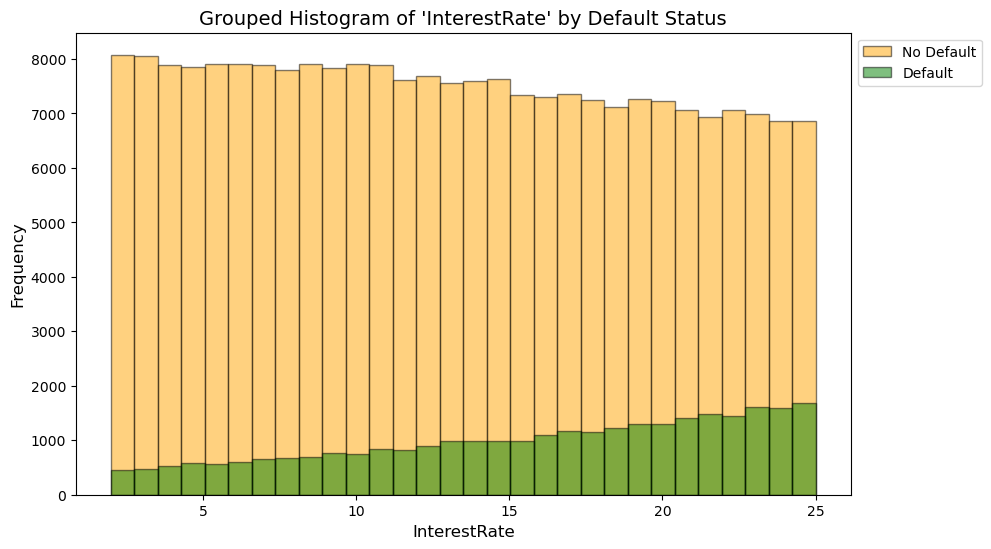

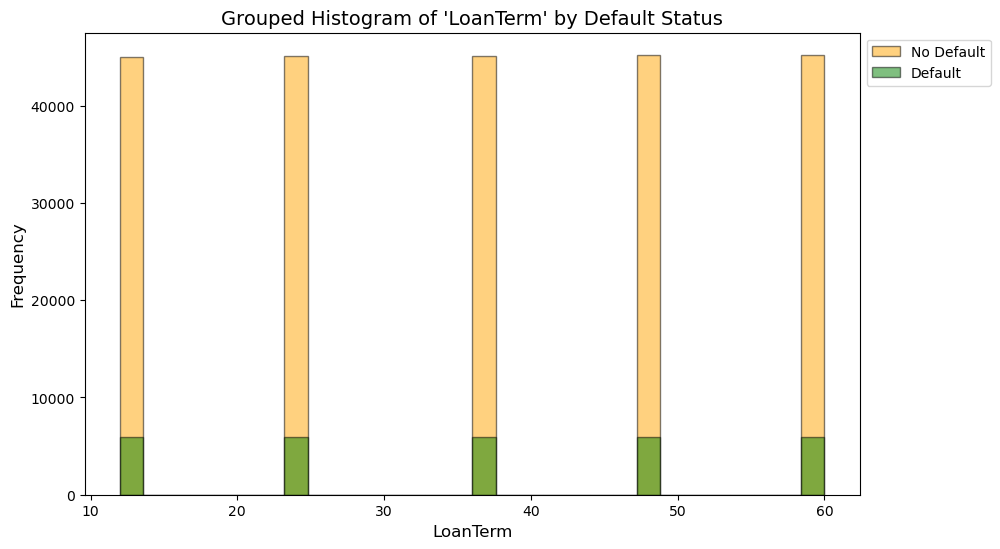

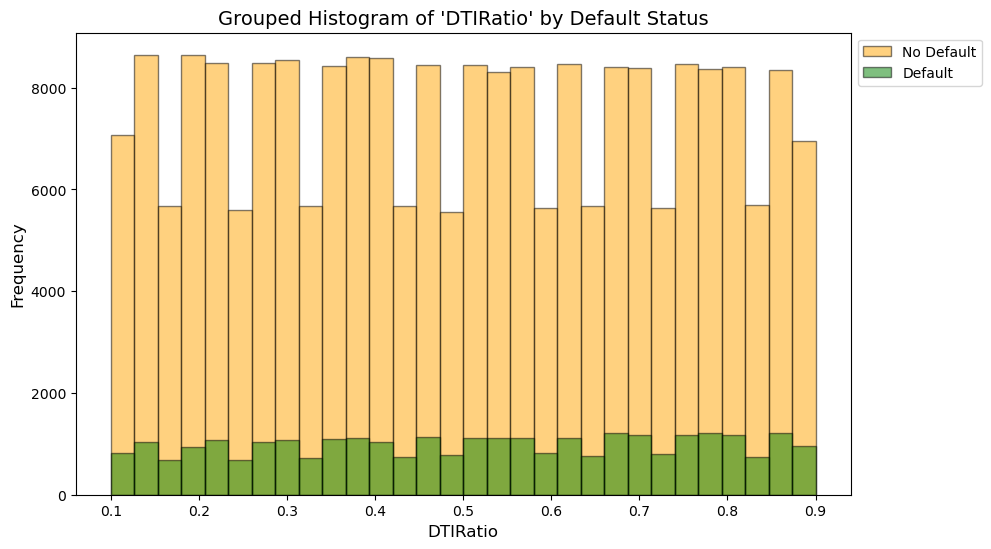

In [14]:
# excluding 'Default'
numeric_no_default = numeric_columns.drop("Default")

bins = 30

for col in numeric_no_default:
    plt.figure(figsize=(10, 6))
    
    plt.hist(loan[loan["Default"] == 0][col], bins=bins, alpha=0.5, label="No Default", color='orange', edgecolor='black')
    plt.hist(loan[loan["Default"] == 1][col], bins=bins, alpha=0.5, label="Default", color='green', edgecolor='black')
    
    plt.title(f"Grouped Histogram of '{col}' by Default Status", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

#### Taking a closer look at grouped histogram of 'Age' by 'Default Status'

Analyzing how age distribution varies between defaulted and non-defaulted loans to understand potential risk factors.

Using 10 bins to provide a detailed view of the distribution while keeping the visualization clear.

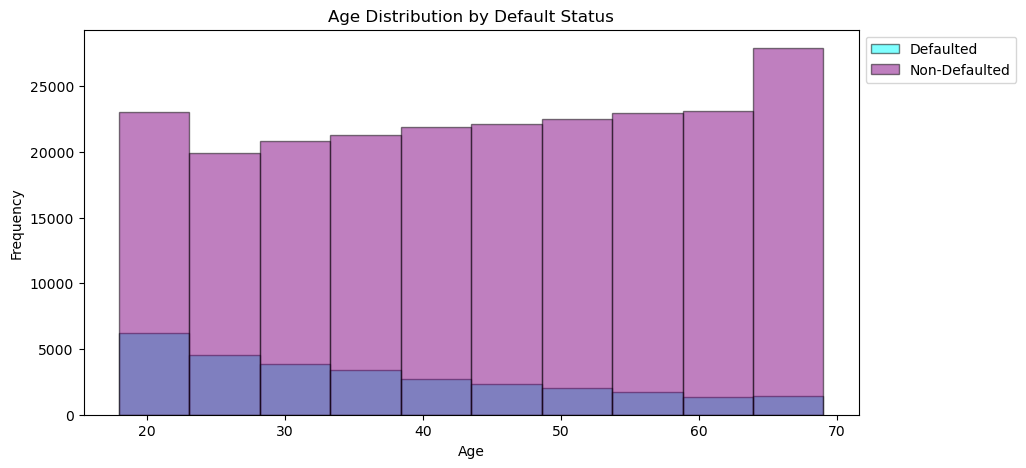

In [15]:
plt.figure(figsize=(10, 5))

# with 10 bin
plt.hist(loan[loan['Default'] == 1]['Age'], bins=10, alpha=0.5, label='Defaulted', color='cyan', edgecolor='black')
plt.hist(loan[loan['Default'] == 0]['Age'], bins=10, alpha=0.5, label='Non-Defaulted', color='purple', edgecolor='black')


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Default Status')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.show()


#### Taking a closer look at grouped histogram of 'LoanAmount' by 'Default Status'


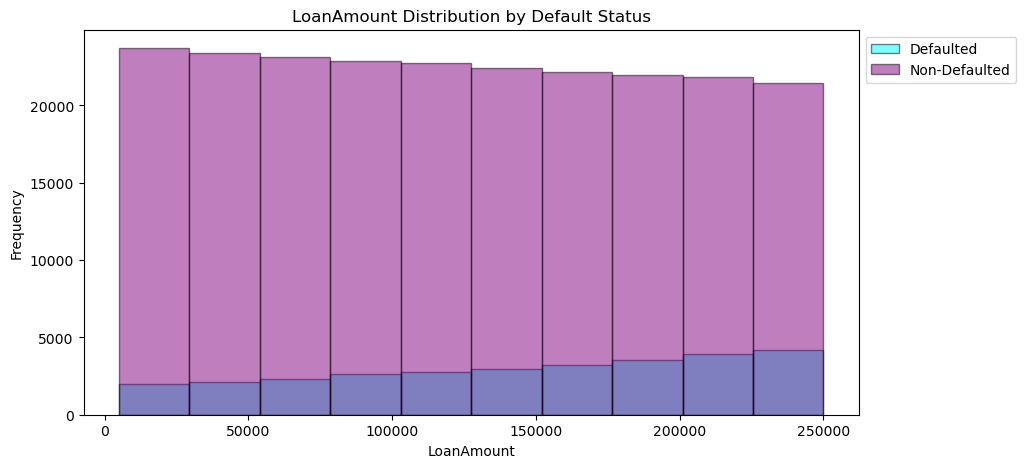

In [16]:
plt.figure(figsize=(10, 5))

plt.hist(loan[loan['Default'] == 1]['LoanAmount'], bins=10, alpha=0.5, label='Defaulted', color='cyan', edgecolor='black')
plt.hist(loan[loan['Default'] == 0]['LoanAmount'], bins=10, alpha=0.5, label='Non-Defaulted', color='purple', edgecolor='black')


plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.title('LoanAmount Distribution by Default Status')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.show()

<div style="border-radius: 10px; border: green solid; padding: 10px; background-color: #; font-size: 100%;">

- ### Draw a bar plot to indicate total counts of each categorical variable in a given column.


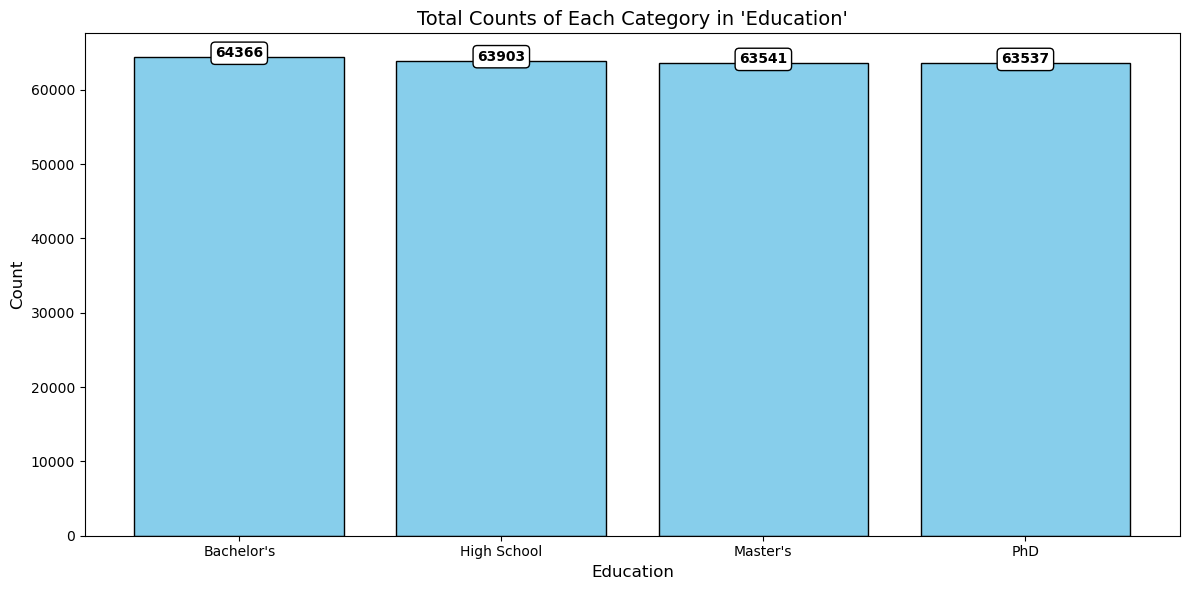

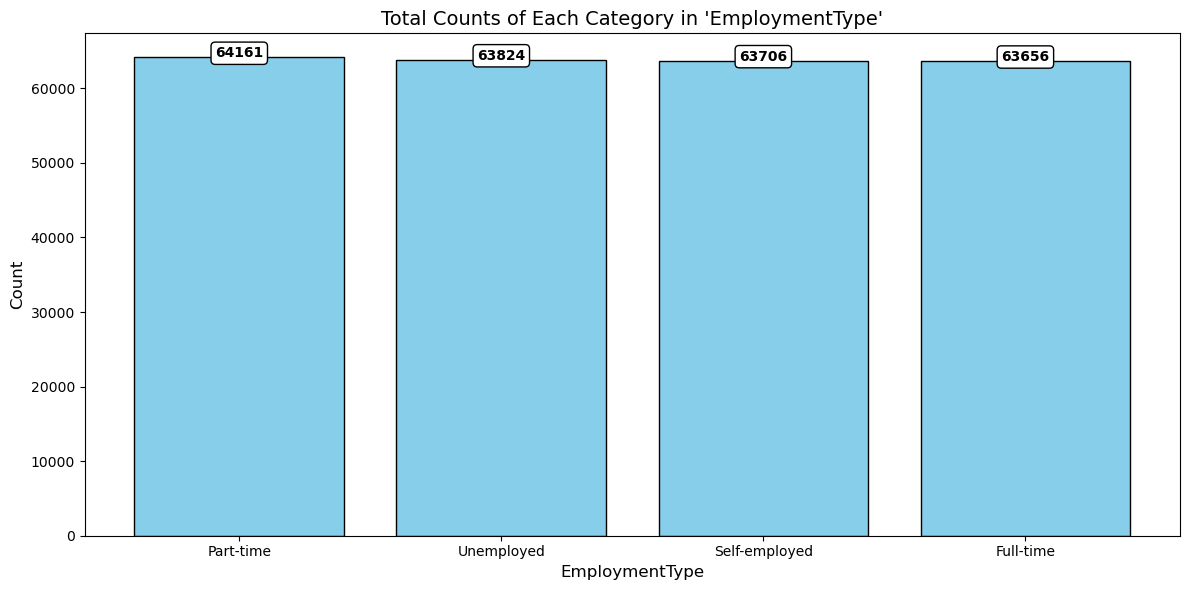

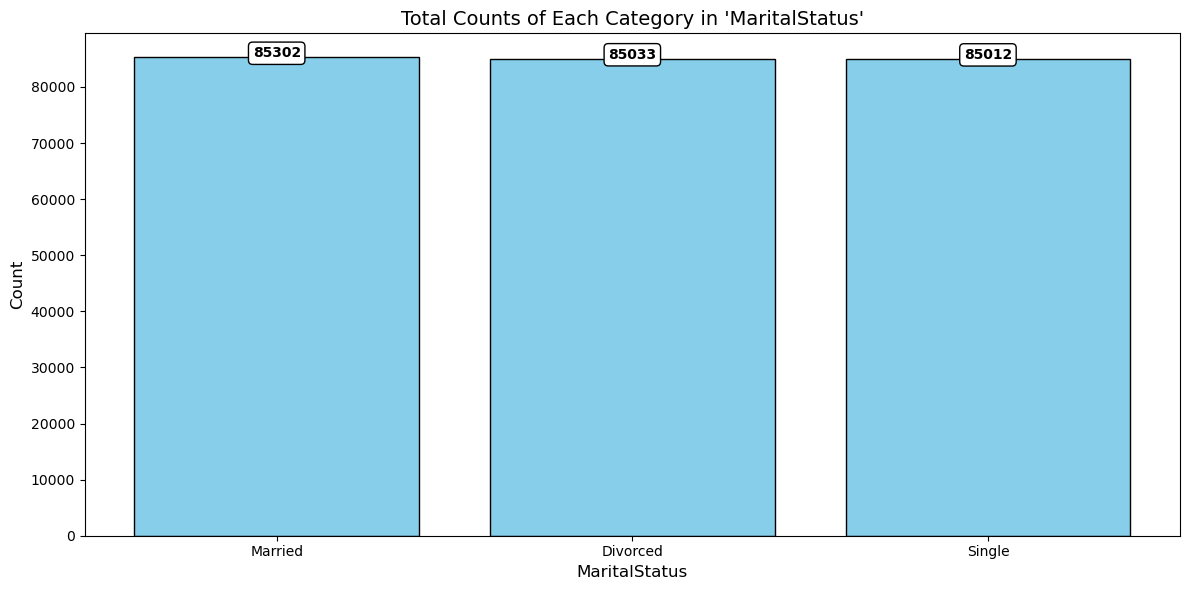

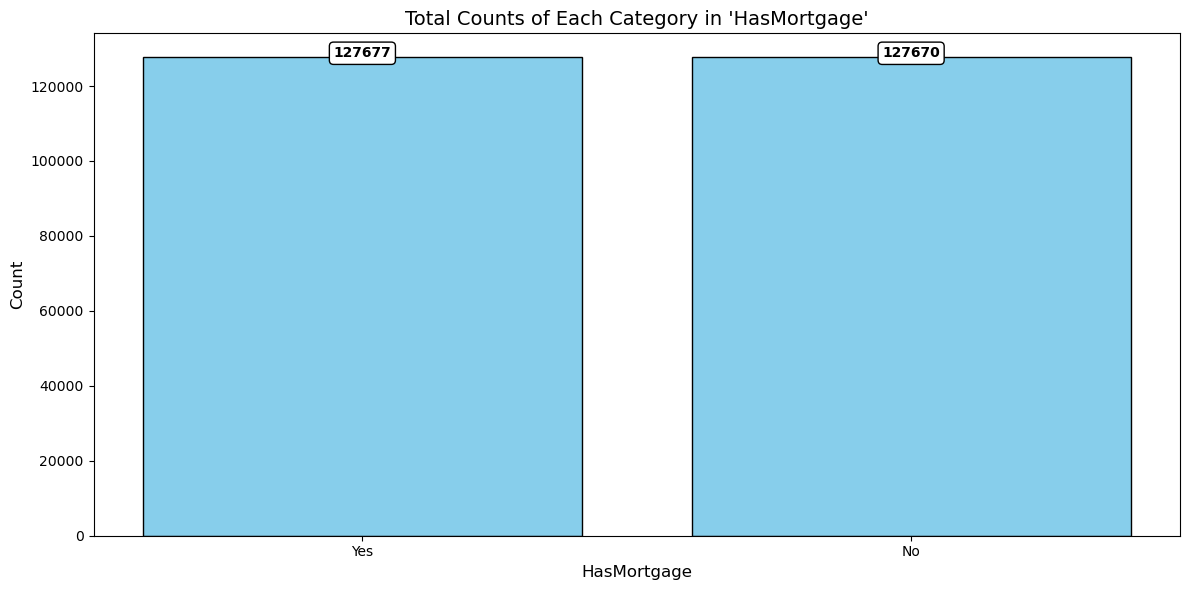

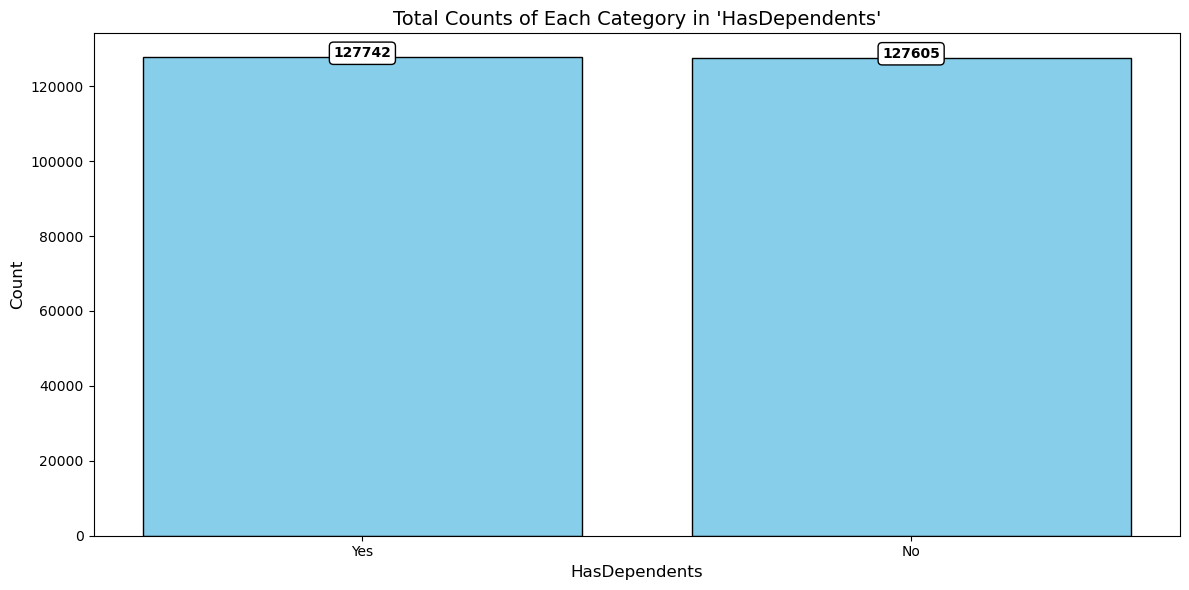

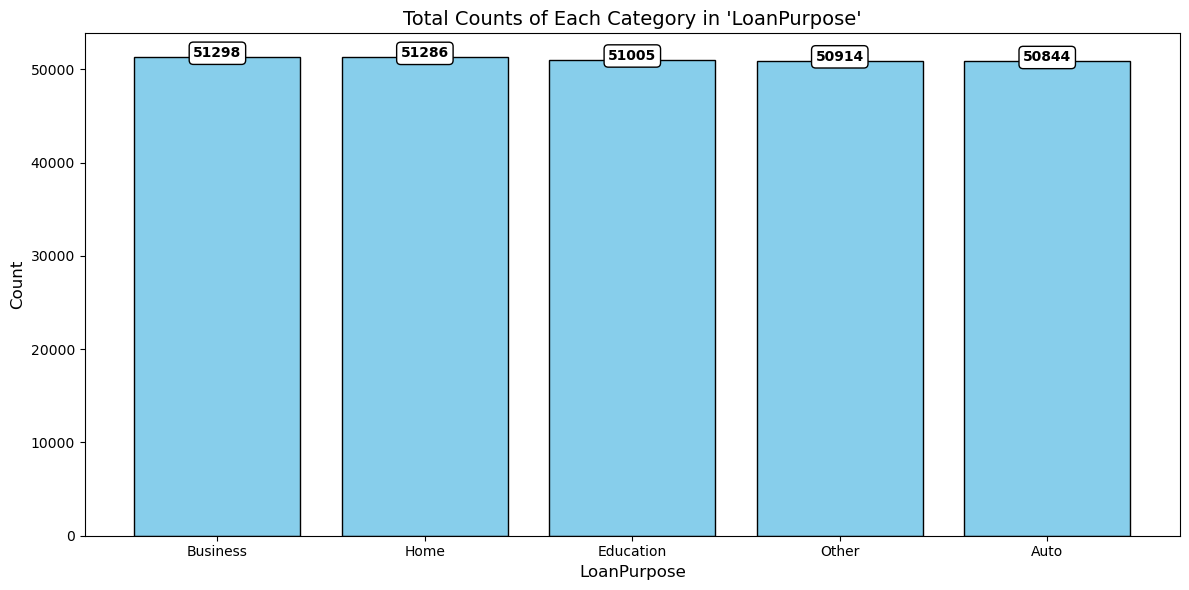

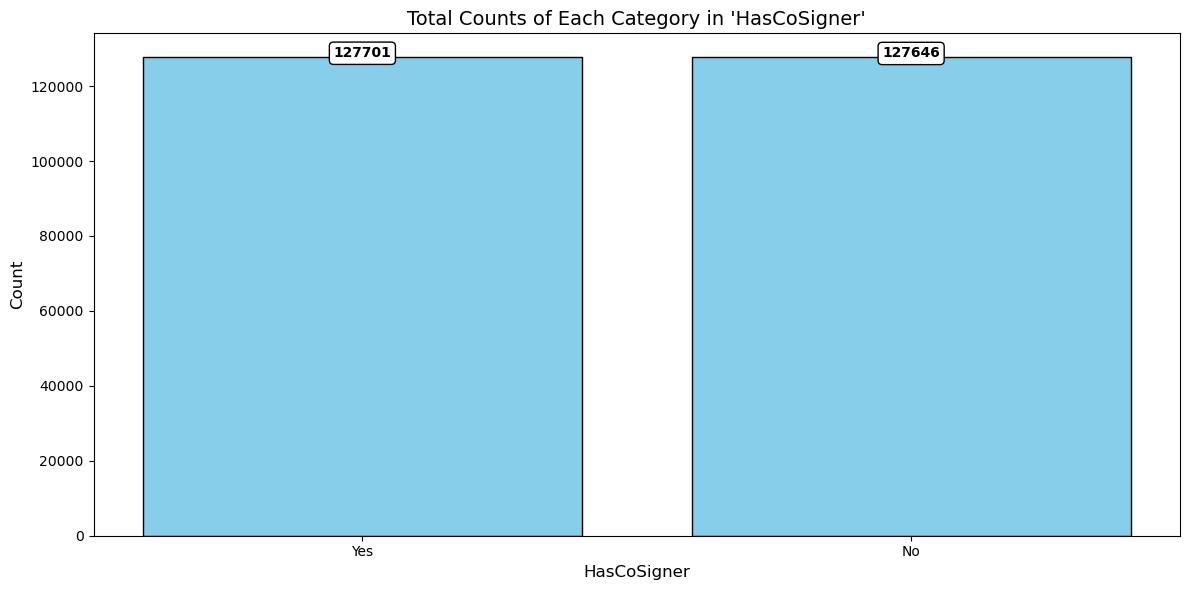

In [17]:
# excluding LoanID
categorical_columns = loan.select_dtypes(include=["object"]).columns.drop("LoanID")

for col in categorical_columns:
    category_counts = loan[col].value_counts()
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')

    plt.title(f"Total Counts of Each Category in '{col}'", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)

    for bar in bars:
        height = bar.get_height()
        x_position = bar.get_x() + bar.get_width() / 2
        
        plt.text(x_position, height, str(int(height)), ha='center', fontsize=10, fontweight='bold', 
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


    plt.tight_layout() 
    plt.show()


<div style="border-radius: 10px; border: green solid; padding: 10px; background-color: #; font-size: 100%;">

- ### Find means, medians, and modes.


In [18]:
statistics = []

for column in numeric_columns:
    mean_value = round(loan[column].mean(), 2)  
    median_value = loan[column].median()
    mode_values = loan[column].mode().tolist()  
    
    statistics.append([column, mean_value, median_value, mode_values])

stats_df = pd.DataFrame(statistics, columns=['Column Name', 'Mean', 'Median', 'Modes'])

stats_df

,Column Name,Mean,Median,Modes
0,Age,43.50,43.00,[55]
1,Income,82499.30,82466.00,"[69492, 117102, 121985]"
2,LoanAmount,127578.87,127556.00,"[95419, 133724, 221949]"
3,CreditScore,574.26,574.00,[630]
4,MonthsEmployed,59.54,60.00,[56]
5,NumCreditLines,2.50,2.00,[2]
6,InterestRate,13.49,13.46,[14.92]
7,LoanTerm,36.03,36.00,[48]
8,DTIRatio,0.50,0.50,[0.67]
9,Default,0.12,0.00,[0]


***
### Conclusions

#### 1. Are the data what we expect? Are they usable?

- The data appear **reasonable and usable**, with key financial information like Age, Income, Loan Amount, Credit Score, etc. showing expected distributions. There are no obvious missing or invalid values in the columns, making the dataset usable for analysis.

#### 2. Overall Shape of the Distributions

- The overall shape of the distribution **varies across different features**. `Age` has a bimodal distribution with two peaks, while `Income, Loan Amount, Credit Score, Months Employed, DTI Ratio, and Interest Rate` appear to follow a uniform distribution, where values are spread evenly. `Loan Term` has noticeable gaps, likely because certain values are more common. `Default` Status is highly skewed, with most borrowers not defaulting, making it an imbalanced binary distribution.

#### 3. Are there any outliers?

- There are **no outliers found** in most of the numerical data. However, the `Default` column has a very unbalanced distribution. This means that most borrowers did not default, while a smaller group did. Out of the total 255,347 borrowers, 225,694 (88.3%) did not default, while 29,653 (11.7%) defaulted, making the data highly skewed.

#### 4.  How does the distribution change across different groups?

- When grouped by `Default` Status:
    - Defaulted borrowers (1) tend to have lower `Income and Months Employed`, indicating financial instability.
    - Defaulted borrowers (1) tend to have younger `Age` and higher `Loan Amount and Interest Rate`, suggesting higher borrowing costs and riskier profiles. 
    - The distribution of `Num Credit Lines and Loan Term` is similar for both groups, meaning these factors alone may not strongly predict default.
 
#### 5. What are the minimum and maximum values represented in each histogram?


In [19]:
# min and max values
min_max_df = pd.DataFrame({
    'Column Name': numeric_columns,
    'Minimum Value': loan[numeric_columns].min().values,
    'Maximum Value': loan[numeric_columns].max().values
})

min_max_df

,Column Name,Minimum Value,Maximum Value
0,Age,18.0,69.0
1,Income,15000.0,149999.0
2,LoanAmount,5000.0,249999.0
3,CreditScore,300.0,849.0
4,MonthsEmployed,0.0,119.0
5,NumCreditLines,1.0,4.0
6,InterestRate,2.0,25.0
7,LoanTerm,12.0,60.0
8,DTIRatio,0.1,0.9
9,Default,0.0,1.0


In [20]:
loan.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


#### 6. How do bin sizes affect the histogram? Does changing the bin width reveal different patterns in the data?

- Changing the bin size in the histogram changes how the data looks. If the bins are small, we can see more details and small changes, but it might also show too much noise. If the bins are big, the shape looks smoother and easier to understand, but some important details might be missing.
  
- Taking the grouped histogram of `'Age' by 'Default Status'` as an example, when the bin size is 10, the distribution appears right-skewed, helping to conclude that younger borrowers tend to default more. However, when the bin size is increased to 30, it shows more details and multiple peaks, showing a more complex pattern in the age distribution among defaulters.

#### 7. Does the distribution appear normal, or does it have a different distribution?
- The data does not follow a normal distribution. `Age` has two peaks instead of one. `Income, Loan Amount, Credit Score, Months Employed, DTI Ratio, and Interest Rate` are spread more evenly, not forming a bell shape. `Loan Term` has gaps, meaning some values appear more often. `Default` Status is very unbalanced, with most people not defaulting. And, all `categorical columns` are evenly distributed, meaning no single category is too dominant.


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

***
### Reproducing the Bar Chart from Storytelling with Data (p. 64)

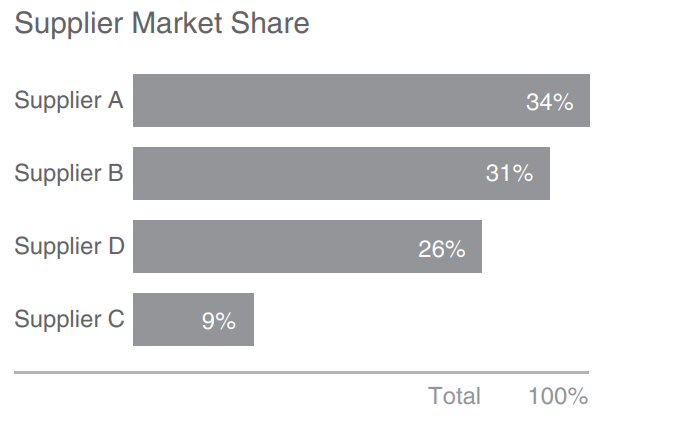

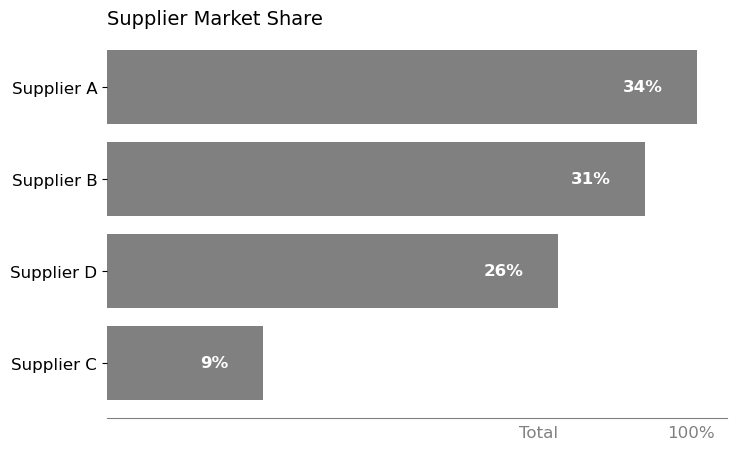

In [21]:
# Create a DataFrame 
data = {
    'Supplier': ['Supplier A', 'Supplier B', 'Supplier D', 'Supplier C'],
    'Market Share': [34, 31, 26, 9]
}
df = pd.DataFrame(data)

# Reverse to get the highest value is at the top
df = df[::-1]

# horizontal bar chart
plt.figure(figsize=(8, 5)) 
bars = plt.barh(df['Supplier'], df['Market Share'], color="gray")

# Add percentage labels inside the bars
for bar, percentage in zip(bars, df['Market Share']):
    plt.text(bar.get_width() - 2, 
             bar.get_y() + bar.get_height()/2,  
             f"{percentage}%",  # Display percentage
             va='center', ha='right', color='white', fontsize=12, fontweight='bold')

plt.title("Supplier Market Share", fontsize=14, loc='left')

#Clean up
plt.gca().spines["top"].set_visible(False) 
plt.gca().spines["right"].set_visible(False) 
plt.gca().spines["left"].set_visible(False)  
plt.gca().spines["bottom"].set_color("gray") 

# Add a "Total 100%" label at the bottom
plt.text(26, -0.8, "Total", fontsize=12, ha='right', color='gray')
plt.text(35, -0.8, "100%", fontsize=12, ha='right', color='gray')

# Hide x-axis labels
plt.xticks([])  
plt.yticks(fontsize=12) 

plt.show()